# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import io
print('Modules are imported.')

Modules are imported.


In [6]:
from google.colab import files
uploaded = files.upload()

Saving covid19_Confirmed_dataset.csv to covid19_Confirmed_dataset (1).csv
Saving worldwide_happiness_report.csv to worldwide_happiness_report (1).csv


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [12]:
corona_dataset_csv = pd.read_csv(io.StringIO(uploaded["covid19_Confirmed_dataset.csv"].decode('utf-8')))
corona_dataset_csv.head()

Province/State Country/Region      Lat  ...  4/28/20  4/29/20  4/30/20
0            NaN    Afghanistan  33.0000  ...     1828     1939     2171
1            NaN        Albania  41.1533  ...      750      766      773
2            NaN        Algeria  28.0339  ...     3649     3848     4006
3            NaN        Andorra  42.5063  ...      743      743      745
4            NaN         Angola -11.2027  ...       27       27       27

[5 rows x 104 columns]

#### Let's check the shape of the dataframe

In [13]:
corona_dataset_csv.shape
# to know number of rows and columns

(266, 104)

### Task 2.2: Delete the useless columns

In [14]:
df = corona_dataset_csv.drop(["Lat","Long"],axis =1)
# axis 0=row & 1 =column ,in brackets specified names which you want to drop
# to overwrite existing dataset we are using inplace
corona_dataset_csv.drop(["Lat","Long"],axis =1,inplace =True)

In [15]:
corona_dataset_csv.head(10)


Province/State       Country/Region  ...  4/29/20  4/30/20
0                           NaN          Afghanistan  ...     1939     2171
1                           NaN              Albania  ...      766      773
2                           NaN              Algeria  ...     3848     4006
3                           NaN              Andorra  ...      743      745
4                           NaN               Angola  ...       27       27
5                           NaN  Antigua and Barbuda  ...       24       24
6                           NaN            Argentina  ...     4285     4428
7                           NaN              Armenia  ...     1932     2066
8  Australian Capital Territory            Australia  ...      106      106
9               New South Wales            Australia  ...     3016     3025

[10 rows x 102 columns]

### Task 2.3: Aggregating the rows by the country

In [16]:
corona_dataset_aggregated =corona_dataset_csv.groupby("Country/Region").sum()

In [17]:
corona_dataset_aggregated.head()

1/22/20  1/23/20  1/24/20  ...  4/28/20  4/29/20  4/30/20
Country/Region                             ...                           
Afghanistan           0        0        0  ...     1828     1939     2171
Albania               0        0        0  ...      750      766      773
Algeria               0        0        0  ...     3649     3848     4006
Andorra               0        0        0  ...      743      743      745
Angola                0        0        0  ...       27       27       27

[5 rows x 100 columns]

In [18]:
corona_dataset_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

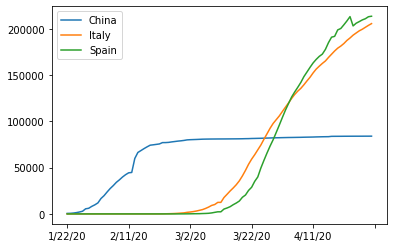

In [19]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

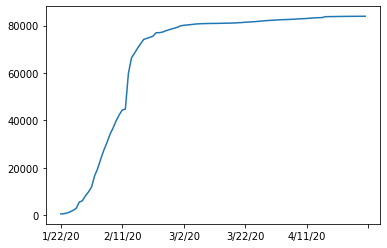

In [20]:
corona_dataset_aggregated.loc['China'].plot()


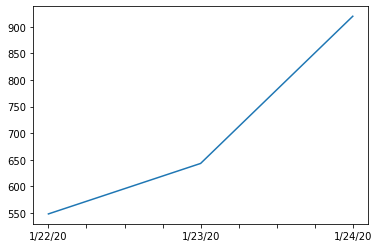

In [21]:
corona_dataset_aggregated.loc["China"][:3].plot()

### task 3.1: caculating the first derivative of the curve

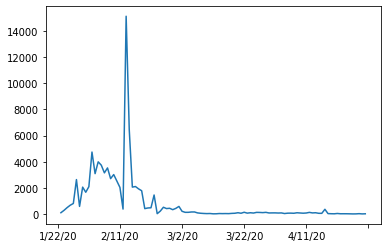

In [22]:
corona_dataset_aggregated.loc["China"].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [23]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [25]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [24]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [26]:
corona_dataset_aggregated.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=187)

In [27]:
countries = list(corona_dataset_aggregated.index)
print(countries)


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [28]:
max_infec_rates = []
for c in countries:
    max_infec_rates.append(corona_dataset_aggregated.loc[c].diff().max())

max_infec_rates
    

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [29]:
corona_dataset_aggregated["Max_infected_rate"]=max_infec_rates
corona_dataset_aggregated.head()

1/22/20  1/23/20  1/24/20  ...  4/29/20  4/30/20  Max_infected_rate
Country/Region                             ...                                     
Afghanistan           0        0        0  ...     1939     2171              232.0
Albania               0        0        0  ...      766      773               34.0
Algeria               0        0        0  ...     3848     4006              199.0
Andorra               0        0        0  ...      743      745               43.0
Angola                0        0        0  ...       27       27                5.0

[5 rows x 101 columns]

### Task 3.4: create a new dataframe with only needed column 

In [31]:
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infected_rate"])

In [32]:
corona_data.head()

Max_infected_rate
Country/Region                   
Afghanistan                 232.0
Albania                      34.0
Algeria                     199.0
Andorra                      43.0
Angola                        5.0

### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [35]:
happiness_report = pd.read_csv(io.StringIO(uploaded["worldwide_happiness_report.csv"].decode('utf-8')))

In [36]:
happiness_report.head()

Overall rank Country or region  ...  Generosity  Perceptions of corruption
0             1           Finland  ...       0.153                      0.393
1             2           Denmark  ...       0.252                      0.410
2             3            Norway  ...       0.271                      0.341
3             4           Iceland  ...       0.354                      0.118
4             5       Netherlands  ...       0.322                      0.298

[5 rows x 9 columns]

### Task 4.2: let's drop the useless columns 

In [37]:
useless_col = ["Overall rank", "Score","Generosity","Perceptions of corruption"]
happiness_report.drop(useless_col,axis=1,inplace=True)

In [38]:
happiness_report.head()

Country or region  ...  Freedom to make life choices
0           Finland  ...                         0.596
1           Denmark  ...                         0.592
2            Norway  ...                         0.603
3           Iceland  ...                         0.591
4       Netherlands  ...                         0.557

[5 rows x 5 columns]

### Task 4.3: changing the indices of the dataframe

In [39]:
happiness_report.set_index("Country or region",inplace =True)
happiness_report.head()

GDP per capita  ...  Freedom to make life choices
Country or region                  ...                              
Finland                     1.340  ...                         0.596
Denmark                     1.383  ...                         0.592
Norway                      1.488  ...                         0.603
Iceland                     1.380  ...                         0.591
Netherlands                 1.396  ...                         0.557

[5 rows x 4 columns]

### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [43]:
corona_data.head()


Max_infected_rate
Country/Region                   
Afghanistan                 232.0
Albania                      34.0
Algeria                     199.0
Andorra                      43.0
Angola                        5.0

In [44]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [40]:
happiness_report.head()

GDP per capita  ...  Freedom to make life choices
Country or region                  ...                              
Finland                     1.340  ...                         0.596
Denmark                     1.383  ...                         0.592
Norway                      1.488  ...                         0.603
Iceland                     1.380  ...                         0.591
Netherlands                 1.396  ...                         0.557

[5 rows x 4 columns]

In [ ]:
happiness_report.shape

In [42]:
data = corona_data.join(happiness_report,how ="inner")
data.head()

Max_infected_rate  ...  Freedom to make life choices
Afghanistan              232.0  ...                         0.000
Albania                   34.0  ...                         0.383
Algeria                  199.0  ...                         0.086
Argentina                291.0  ...                         0.471
Armenia                  134.0  ...                         0.283

[5 rows x 5 columns]

### Task 4.5: correlation matrix 

In [45]:
data.corr()

Max_infected_rate  ...  Freedom to make life choices
Max_infected_rate                      1.000000  ...                      0.078196
GDP per capita                         0.250118  ...                      0.394603
Social support                         0.191958  ...                      0.456246
Healthy life expectancy                0.289263  ...                      0.427892
Freedom to make life choices           0.078196  ...                      1.000000

[5 rows x 5 columns]

### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [46]:
data.head()

Max_infected_rate  ...  Freedom to make life choices
Afghanistan              232.0  ...                         0.000
Albania                   34.0  ...                         0.383
Algeria                  199.0  ...                         0.086
Argentina                291.0  ...                         0.471
Armenia                  134.0  ...                         0.283

[5 rows x 5 columns]

### Task 5.1: Plotting GDP vs maximum Infection rate

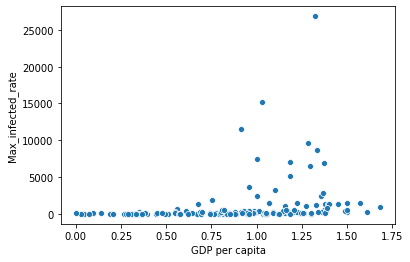

In [47]:
x = data["GDP per capita"]
y = data["Max_infected_rate"]
sns.scatterplot(x,y)

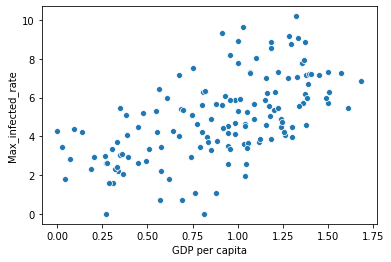

In [48]:
sns.scatterplot(x,np.log(y))

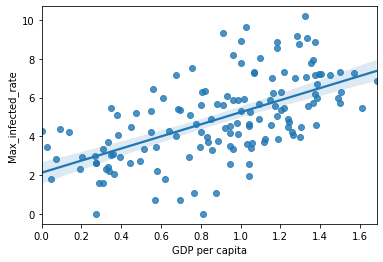

In [49]:
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

In [50]:
x = data["Social support"]
y = data["Max_infected_rate"]
sns.scatterplot(x,y)

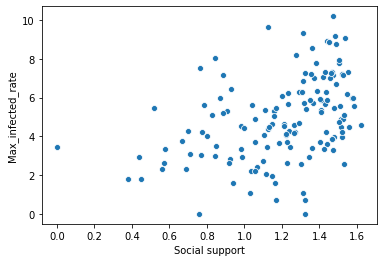

In [53]:
x = data["Social support"]
y = data["Max_infected_rate"]
sns.scatterplot(x,np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

In [52]:
x = data["Healthy life expectancy"]
y = data["Max_infected_rate"]
sns.scatterplot(x,y)

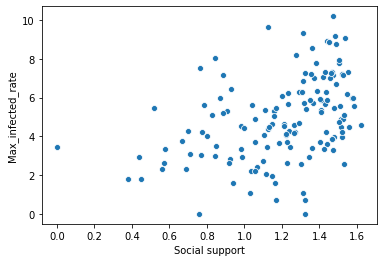

In [54]:
sns.scatterplot(x,np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

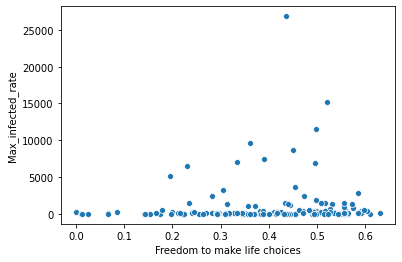

In [55]:
x = data["Freedom to make life choices"]
y = data["Max_infected_rate"]
sns.scatterplot(x,y)

In [56]:
sns.scatterplot(x,np.log(y))